## Fashion MNIST dataset

Source : https://github.com/zalandoresearch/fashion-mnist
<br>
Credit : deeplearning.ai

In [1]:
## import libraries
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
## import data

fashion_mnist = tf.keras.datasets.fashion_mnist


In [3]:
## load data and splitting dataset into training, testing sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(f'Length of train images: {len(train_images)}')
print(f'Length of test images: {len(test_images)}')

Length of train images: 60000
Length of test images: 10000


LABEL: 5

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2 

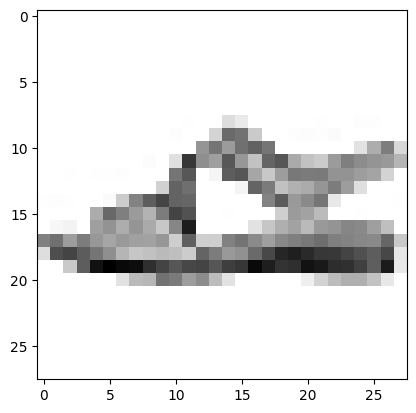

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# number between 0-59999
index = 43

# set number of characters per row when printing
np.set_printoptions(linewidth=320)

# print label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

# visualize the image
plt.imshow(train_images[index], cmap='Greys')

In [6]:
# normalize the pixel values of the train and test images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = tf.keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(10,activation= tf.nn.softmax)
])

In [8]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 10s 4ms/step - loss: 0.4924 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3767 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3378 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3132 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2951 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2831 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2695 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2601 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2497 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

In [9]:
# evaluate the model on unseen images
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8846


[0.33015719056129456, 0.8845999836921692]

#### CALLBACKS

In [10]:
# When experimenting with different numbers of epochs, How can I stop training when I reach a point that I want to be at?
# the training loop does support callbacks : every epoch, you can callback to a code function, having checked the metrics.
# If metrics are what you want to see, then you can cancel the training at that point. Let's take a look

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.22):
            print(f'\nLoss is low so cancelling training... (epochs is {epoch})')
            self.model.stop_training = True

In [11]:
callback = myCallback()
model.fit(train_images, train_labels, epochs=50, callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2327 - accuracy: 0.9123
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2264 - accuracy: 0.9151
Epoch 3/50
1871/1875 [============================>.] - ETA: 0s - loss: 0.2189 - accuracy: 0.9174
Loss is low so cancelling training... (epochs is 2)
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2188 - accuracy: 0.9174


In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8822


[0.34001851081848145, 0.8822000026702881]